In [5]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
x_train /= 255
x_test /= 255
input_shape = (28, 28, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1611 - accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1347 - accuracy: 0.9593
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1179 - accuracy: 0.9650
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1041 - accuracy: 0.9685
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0931 - accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0853 - accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0783 - accuracy: 0.9753
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0743 - accuracy: 0.9760
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0674 - accuracy: 0.9789
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0701 - accuracy: 0.9783


[0.07009807229042053, 0.9782999753952026]

## Manually checking the accuracy

1/1 [==============================] - 0s 109ms/step
ans:  3


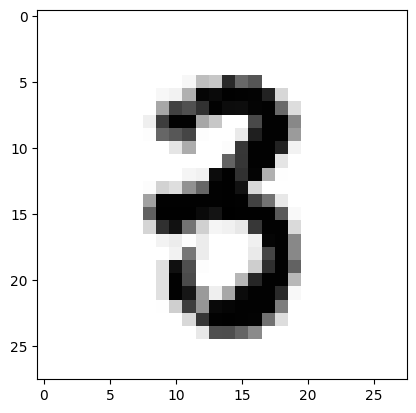

In [16]:
import matplotlib.pyplot as plt
image_index = 2853
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("ans: ", pred.argmax())

In [17]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 4s - loss: 0.0701 - accuracy: 0.9783 - 4s/epoch - 13ms/step
Restored model, accuracy: 97.83%


In [18]:
model.save('my_model.keras')

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      